# Data Preprocessor
In this notebook I will preprocess the data for visualisation in d3.js

In [57]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv('crypto-markets.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

data[:10]

TypeError: invalid type comparison

In [31]:
# Create volume chart
vol = data.groupby(['date'])['date','volume'].sum()
vol = vol[vol['volume'] != 0]
vol.to_csv('volume.csv')

In [34]:
# bar chart
bar = data[['date', 'volume', 'coin']].copy()
all_bar = bar[['volume', 'coin']]

not_top2 = all_bar.groupby('coin').sum().sort_values('volume', ascending=False).index[10:]
bar['coin'] = bar['coin'].replace(not_top2, 'other')

In [87]:
bar_proc = bar.groupby([bar['date'].dt.to_period('M'), 'coin'])

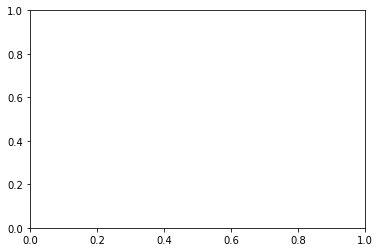

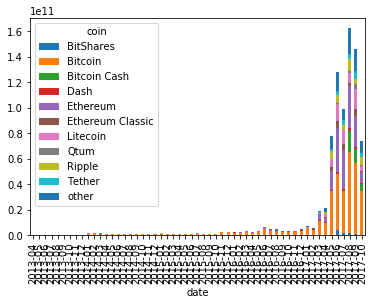

In [112]:
bar_result = bar_proc.sum()
bar_result = bar_result.unstack(level=-1)
bar_result.columns = bar_result.columns.droplevel(0)


plt.cla()
bar_result.plot.bar(stacked=True)
plt.show()


In [115]:
bar_result.to_csv('volume_per_coin_per_month.csv')